In [2]:
import pandas as pd
import numpy as np
import requests
import json
from scipy.stats import linregress
from citipy import citipy
import random
from config import api_key
import time
import matplotlib.pyplot as plt

In [3]:
#how does citipy work
#https://github.com/wingchen/citipy#looking-up-with-coordinates
city = citipy.nearest_city(41.8, -87.6)

In [4]:
city.city_name

'chicago'

In [5]:
city.country_code

'us'

In [6]:
lat_range = (-90, 90)
lng_range = (-180, 180)

In [7]:
lat_lngs = []
cities = []

In [8]:
lats = np.random.uniform(-90, 90, size = 1500)
longs = np.random.uniform(-180, 180, size = 1500)

In [9]:
lat_longs=pd.DataFrame({"latitude":lats,
                       "longitude":longs})

In [10]:
lat_longs

,latitude,longitude
0,-46.319927,-159.363896
1,-37.178504,-125.466472
2,12.588375,62.633902
3,-52.190328,-8.177964
4,-52.304307,-167.981671
...,...,...
1495,-53.731416,83.824827
1496,75.460148,-16.027069
1497,3.073103,137.261696
1498,-52.486147,-71.350992


In [11]:
cities = []

for index, row in lat_longs.iterrows():
    city = citipy.nearest_city(row["latitude"], row["longitude"]).city_name
    
    if city not in cities:
        cities.append(city)



In [12]:
len(cities)

618

In [13]:
weather=pd.DataFrame({"city":cities})

weather.head()

,city
0,mataura
1,rikitea
2,salalah
3,cape town
4,vaini


In [14]:
weather["latitude"] = ""
weather["longitude"] = ""
weather["temperature"] = ""
weather["humidity"] = ""
weather["cloudiness"] = ""
weather["wind"] = ""
weather["timestamp"] = ""
weather.head()

,city,latitude,longitude,temperature,humidity,cloudiness,wind,timestamp
0,mataura,,,,,,,
1,rikitea,,,,,,,
2,salalah,,,,,,,
3,cape town,,,,,,,
4,vaini,,,,,,,


In [15]:
# what inputs does open weather need
# https://openweathermap.org/current
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

In [16]:
#api call from open weather to get some weather

In [17]:
test = "husavik"

In [18]:
response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={test}&appid={api_key}&units=imperial").json()

In [19]:
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 66.0449,
        "lon": -17.3389
    },
    "dt": 1611863267,
    "id": 2629833,
    "main": {
        "feels_like": -11.87,
        "humidity": 84,
        "pressure": 1013,
        "temp": -4,
        "temp_max": -4,
        "temp_min": -4
    },
    "name": "Husavik",
    "sys": {
        "country": "IS",
        "id": 83,
        "sunrise": 1611829183,
        "sunset": 1611851084,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 2.3
    }
}


In [20]:
#latitude
response["coord"]["lat"]

66.0449

In [21]:
#longitude
response["coord"]["lon"]

-17.3389

In [22]:
#temp
response["main"]["temp"]

-4

In [23]:
#humidity
response["main"]["humidity"]

84

In [24]:
#cloudiness
response["clouds"]["all"]

0

In [25]:
#wind
response["wind"]["speed"]

2.3

In [26]:
#timestamp
response["dt"]

1611863267

In [30]:
for index, row in weather.iterrows():
    city = row["city"]
    
    not_json_yet = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=imperial")
    
    if not_json_yet.status_code == 200:
        
        response = not_json_yet.json()
    
        weather.loc[index, "latitude"] = response["coord"]["lat"]
        weather.loc[index, "longitude"] = response["coord"]["lon"]
        weather.loc[index, "temperature"] = response["main"]["temp"]
        weather.loc[index, "humidity"] = response["main"]["humidity"]
        weather.loc[index, "cloudiness"] = response["clouds"]["all"]
        weather.loc[index, "wind"] = response["wind"]["speed"]
        weather.loc[index, "timestamp"] = response["dt"]
    
        print(f"Pulling weather for city #{index}, {city}")
    
        time.sleep(1)
        #to prevent maxing out the api call
    
    else: 
        print(f"no data for city #{index}, {city}")

Pulling weather for city #0, mataura
Pulling weather for city #1, rikitea
Pulling weather for city #2, salalah
Pulling weather for city #3, cape town
Pulling weather for city #4, vaini
Pulling weather for city #5, punta arenas
Pulling weather for city #6, barrow
Pulling weather for city #7, ushuaia
Pulling weather for city #8, tiznit
Pulling weather for city #9, tirano
Pulling weather for city #10, souillac
Pulling weather for city #11, naranjal
Pulling weather for city #12, caravelas
Pulling weather for city #13, touros
no data for city #14, saleaula
Pulling weather for city #15, victoria
Pulling weather for city #16, port elizabeth
Pulling weather for city #17, codrington
Pulling weather for city #18, kaitangata
Pulling weather for city #19, qaanaaq
Pulling weather for city #20, neryungri
no data for city #21, tsihombe
Pulling weather for city #22, avsyunino
Pulling weather for city #23, busselton
no data for city #24, taolanaro
Pulling weather for city #25, bredasdorp
Pulling weathe

Pulling weather for city #209, ca mau
Pulling weather for city #210, riachao
Pulling weather for city #211, luoyang
Pulling weather for city #212, mandurah
Pulling weather for city #213, ossora
Pulling weather for city #214, port alfred
Pulling weather for city #215, mecca
Pulling weather for city #216, dikson
Pulling weather for city #217, cockburn town
Pulling weather for city #218, la ronge
Pulling weather for city #219, kikwit
Pulling weather for city #220, quelimane
Pulling weather for city #221, lorengau
Pulling weather for city #222, tezu
Pulling weather for city #223, glencoe
Pulling weather for city #224, brovst
Pulling weather for city #225, ranong
Pulling weather for city #226, husavik
Pulling weather for city #227, bodden town
Pulling weather for city #228, college
Pulling weather for city #229, diffa
Pulling weather for city #230, viedma
Pulling weather for city #231, aberdeen
Pulling weather for city #232, niimi
Pulling weather for city #233, zinder
Pulling weather for ci

Pulling weather for city #416, ankang
Pulling weather for city #417, isangel
Pulling weather for city #418, coquimbo
Pulling weather for city #419, ostrovnoy
Pulling weather for city #420, tura
Pulling weather for city #421, lishan
Pulling weather for city #422, iwaki
Pulling weather for city #423, cerritos
Pulling weather for city #424, bubaque
Pulling weather for city #425, narnaul
Pulling weather for city #426, ilulissat
Pulling weather for city #427, lagoa
Pulling weather for city #428, qaqortoq
Pulling weather for city #429, duluth
Pulling weather for city #430, baghmara
Pulling weather for city #431, los llanos de aridane
Pulling weather for city #432, mount isa
Pulling weather for city #433, mikhaylovka
no data for city #434, bargal
Pulling weather for city #435, tilichiki
Pulling weather for city #436, waingapu
Pulling weather for city #437, alofi
Pulling weather for city #438, bukene
Pulling weather for city #439, great yarmouth
Pulling weather for city #440, flin flon
Pulling

In [31]:
weather

,city,latitude,longitude,temperature,humidity,cloudiness,wind,timestamp
0,mataura,-46.1927,168.864,48,80,87,8.01,1611863377
1,rikitea,-23.1203,-134.969,79.3,69,91,3.94,1611863489
2,salalah,17.0151,54.0924,71.6,60,20,3.44,1611863379
3,cape town,-33.9258,18.4232,65.98,63,0,9.22,1611863282
4,vaini,-21.2,-175.2,77,100,90,21.85,1611863381
...,...,...,...,...,...,...,...,...
613,sirawai,7.5854,122.141,77.49,81,39,8.43,1611864207
614,lolua,,,,,,,
615,haines junction,60.7522,-137.511,-22,76,100,1.54,1611864176
616,kudahuvadhoo,2.6708,72.8944,80.58,78,21,13.09,1611864209


In [32]:
weather.drop(weather.loc[weather["latitude"] == "",:].index, inplace=True)
#borrowed from https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression

In [33]:
weather

,city,latitude,longitude,temperature,humidity,cloudiness,wind,timestamp
0,mataura,-46.1927,168.864,48,80,87,8.01,1611863377
1,rikitea,-23.1203,-134.969,79.3,69,91,3.94,1611863489
2,salalah,17.0151,54.0924,71.6,60,20,3.44,1611863379
3,cape town,-33.9258,18.4232,65.98,63,0,9.22,1611863282
4,vaini,-21.2,-175.2,77,100,90,21.85,1611863381
...,...,...,...,...,...,...,...,...
611,gloucester,51.8657,-2.2431,51.01,89,100,13,1611863937
613,sirawai,7.5854,122.141,77.49,81,39,8.43,1611864207
615,haines junction,60.7522,-137.511,-22,76,100,1.54,1611864176
616,kudahuvadhoo,2.6708,72.8944,80.58,78,21,13.09,1611864209


In [34]:
weather.to_csv("results/weather_data.csv", index=False)

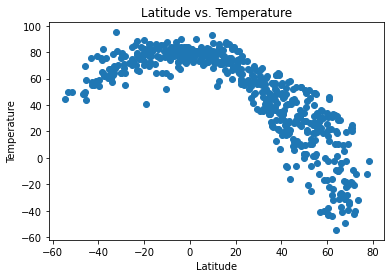

In [35]:
plt.scatter(weather["latitude"], weather["temperature"])
plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.savefig("results/temperature.png")

In [36]:
# data note: my cities list doesn't have any latitudes below -60, but that's because there aren't any cities below that latitude! https://en.wikipedia.org/wiki/Southernmost_settlements

In [37]:
# Each dot in this scatterplot represents one city. Its position on the x axis shows how farth north or south it is on earth, with 0 as the equator. Its position on the y axis shows how hot it was there at the time the data was pulled. There is no data below a latitude of -60 (60 degrees south) because there are no cities that far south. The graph isn't symmetrical because it's winter in the northern hemisphere and summer in the southern hemisphere.

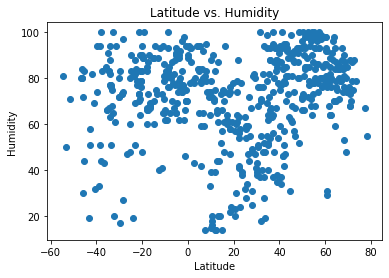

In [38]:
plt.scatter(weather["latitude"], weather["humidity"])
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("results/humidity.png")

In [39]:
weather.loc[weather["humidity"]<30,:]

,city,latitude,longitude,temperature,humidity,cloudiness,wind,timestamp
35,kaele,10.1092,14.4508,80.62,15,2,11.86,1611863415
36,dire,12.2833,-10.9667,80.98,14,97,2.24,1611863416
44,yaan,7.3833,8.5667,83.34,14,100,3.18,1611863426
52,kuraymah,18.55,31.85,66.76,22,55,13.8,1611863435
158,ruidoso,33.3317,-105.673,44.33,28,1,3.44,1611863660
160,rio tercero,-32.173,-64.1141,95.05,20,85,8.79,1611863663
182,cabo san lucas,22.8909,-109.912,76.8,24,40,9.22,1611863539
198,bara,10.3744,10.7288,78.66,16,83,10.63,1611863711
229,diffa,13.3154,12.6113,72.75,20,100,10.8,1611863751
233,zinder,13.8072,8.9881,71.24,20,0,12.3,1611863756


In [40]:
# Each dot in this scatterplot represents one city. Its position on the x axis shows how farth north or south it is on earth, with 0 as the equator. Its position on the y axis shows how humid it was there at the time the data was pulled. We can see a group of cities around latitudes 0-30 that are particularly dry, and looking more closely at the data we can see that almost all of them are in the sahara desert.

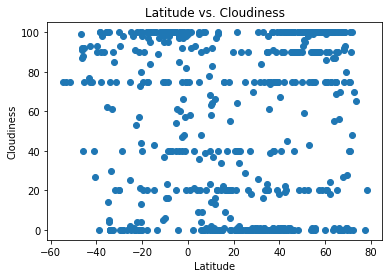

In [41]:
plt.scatter(weather["latitude"], weather["cloudiness"])
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("results/clouds.png")

In [42]:
# Each dot in this scatterplot represents one city. Its position on the x axis shows how farth north or south it is on earth, with 0 as the equator. Its position on the y axis shows how cloudy it was there at the time the data was pulled. At a glance it looks like clouds are pretty evenly distributed. The horizontal bands probably mean that the data isn't precise down to the integer - whoever takes the data probably just estimates 0%, 20%, 40% etc. cloud cover.

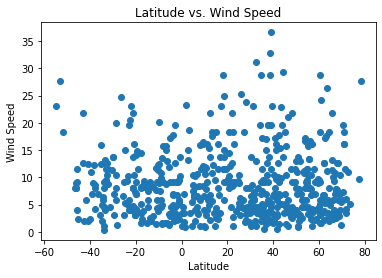

In [43]:
plt.scatter(weather["latitude"], weather["wind"])
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("results/wind.png")

In [44]:
# Each dot in this scatterplot represents one city. Its position on the x axis shows how farth north or south it is on earth, with 0 as the equator. Its position on the y axis shows the wind speed at the time the data was pulled. We see a small group of very windy places around 40 degrees north latitude. This isn't as striking as seeing the sahara on the humidity chart, but I do think that's the trade winds. We could look at this data on different days to check if it's consistent or just random storms. 

In [45]:
#regressions! splitting the data into northern vs southern hemisphere and plotting from each one.

In [46]:
north = weather.loc[weather["latitude"]>0,:]
south = weather.loc[weather["latitude"]<=0,:]

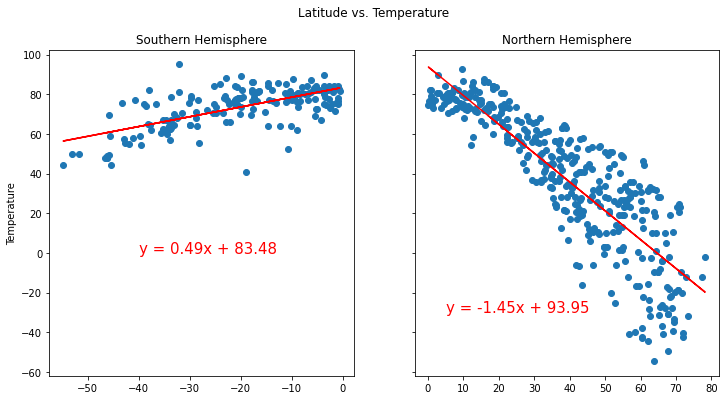

In [47]:
fig, (south_sub, north_sub) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))
fig.suptitle("Latitude vs. Temperature")
south_sub.set_ylabel("Temperature")

south_sub.scatter(south["latitude"],south["temperature"])
south_sub.set_title("Southern Hemisphere")

(south_slope, south_intercept, south_rvalue, south_pvalue, south_stderr) = linregress(south["latitude"].astype(float),south["temperature"].astype(float))
south_regress = south["latitude"] * south_slope + south_intercept
south_line = "y = " + str(round(south_slope,2)) + "x + " + str(round(south_intercept,2))

south_sub.plot(south["latitude"],south_regress,"r-")
south_sub.annotate(south_line,(-40,0),fontsize=15,color="red")


north_sub.scatter(north["latitude"],north["temperature"])
north_sub.set_title("Northern Hemisphere")

(north_slope, north_intercept, north_rvalue, north_pvalue, north_stderr) = linregress(north["latitude"].astype(float),north["temperature"].astype(float))
north_regress = north["latitude"] * north_slope + north_intercept
north_line = "y = " + str(round(north_slope,2)) + "x + " + str(round(north_intercept,2))

north_sub.plot(north["latitude"],north_regress,"r-")
north_sub.annotate(north_line,(5,-30),fontsize=15,color="red")

plt.savefig("results/N&S temperature with regressions.png")

# cast df columns as floats based on this thread: https://stackoverflow.com/questions/53200129/attributeerror-float-object-has-no-attribute-shape-when-using-linregress
# after getting an error in the linear regression

In [48]:
# The linear regression shows how much temperature varies with latitude in each hemisphere at the time the data was pulled. In each case, temperature decreases with latitudes farther away from the equator. At the moment it varies much more with latitude in the northern hemisphere, most likely because it is winter here, and because there are many fewer cities in the southern hemisphere outside the subtropical zone (<35 degrees latitude in either direction).

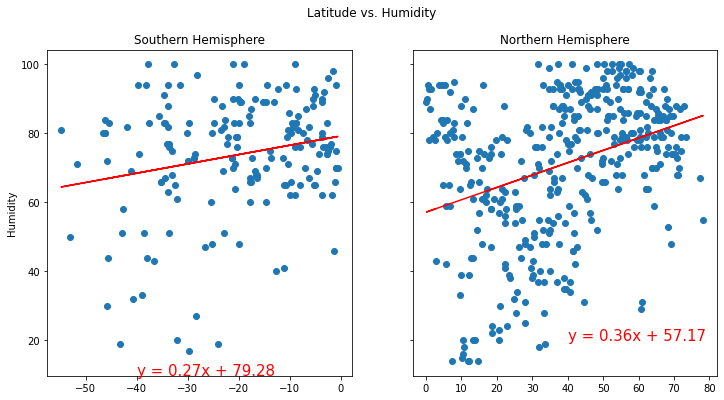

In [49]:
fig, (south_sub, north_sub) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))
fig.suptitle("Latitude vs. Humidity")
south_sub.set_ylabel("Humidity")

south_sub.scatter(south["latitude"],south["humidity"])
south_sub.set_title("Southern Hemisphere")

(south_slope, south_intercept, south_rvalue, south_pvalue, south_stderr) = linregress(south["latitude"].astype(float),south["humidity"].astype(float))
south_regress = south["latitude"] * south_slope + south_intercept
south_line = "y = " + str(round(south_slope,2)) + "x + " + str(round(south_intercept,2))

south_sub.plot(south["latitude"],south_regress,"r-")
south_sub.annotate(south_line,(-40,10),fontsize=15,color="red")


north_sub.scatter(north["latitude"],north["humidity"])
north_sub.set_title("Northern Hemisphere")

(north_slope, north_intercept, north_rvalue, north_pvalue, north_stderr) = linregress(north["latitude"].astype(float),north["humidity"].astype(float))
north_regress = north["latitude"] * north_slope + north_intercept
north_line = "y = " + str(round(north_slope,2)) + "x + " + str(round(north_intercept,2))

north_sub.plot(north["latitude"],north_regress,"r-")
north_sub.annotate(north_line,(40,20),fontsize=15,color="red")

plt.savefig("results/N&S humidity with regressions.png")

In [50]:
# The linear regression shows how much humidity varies with latitude in each hemisphere at the time the data was pulled. In the southern hemisphere, humidity increases as latitudes approach the equator, but in the northern hemisphere, they decrease. A lot of the northern hemisphere's correlation is just measuring the existence of the sahara desert (lat 0-30 and of course, very dry), as we saw above.

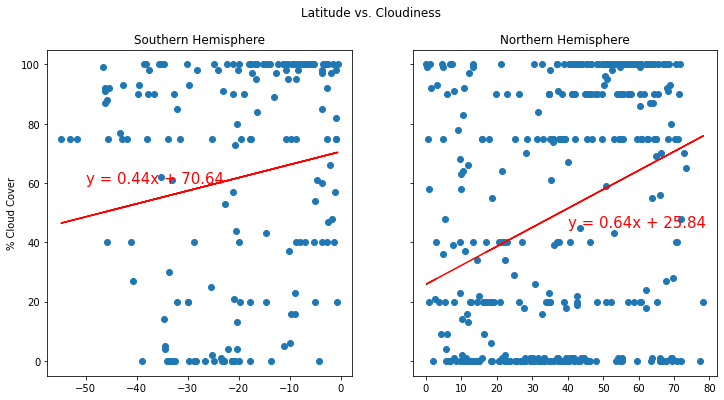

In [51]:
fig, (south_sub, north_sub) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))
fig.suptitle("Latitude vs. Cloudiness")
south_sub.set_ylabel("% Cloud Cover")

south_sub.scatter(south["latitude"],south["cloudiness"])
south_sub.set_title("Southern Hemisphere")

(south_slope, south_intercept, south_rvalue, south_pvalue, south_stderr) = linregress(south["latitude"].astype(float),south["cloudiness"].astype(float))
south_regress = south["latitude"] * south_slope + south_intercept
south_line = "y = " + str(round(south_slope,2)) + "x + " + str(round(south_intercept,2))

south_sub.plot(south["latitude"],south_regress,"r-")
south_sub.annotate(south_line,(-50,60),fontsize=15,color="red")

north_sub.scatter(north["latitude"],north["cloudiness"])
north_sub.set_title("Northern Hemisphere")

(north_slope, north_intercept, north_rvalue, north_pvalue, north_stderr) = linregress(north["latitude"].astype(float),north["cloudiness"].astype(float))
north_regress = north["latitude"] * north_slope + north_intercept
north_line = "y = " + str(round(north_slope,2)) + "x + " + str(round(north_intercept,2))

north_sub.plot(north["latitude"],north_regress,"r-")
north_sub.annotate(north_line,(40,45),fontsize=15,color="red")

plt.savefig("results/N&S cloud cover with regressions.png")

In [52]:
# The linear regression shows how much humidity varies with latitude in each hemisphere at the time the data was pulled. In the southern hemisphere, cloud cover increases as latitudes approach the equator, but in the northern hemisphere, it decreases. This is most likely an effect of humidity.

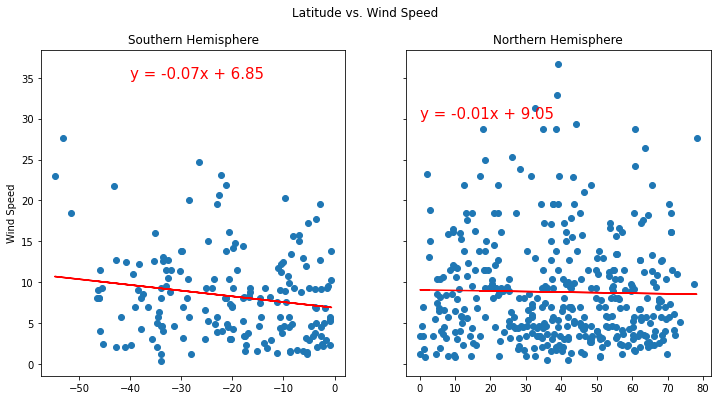

In [53]:
fig, (south_sub, north_sub) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))
fig.suptitle("Latitude vs. Wind Speed")
south_sub.set_ylabel("Wind Speed")

south_sub.scatter(south["latitude"],south["wind"])
south_sub.set_title("Southern Hemisphere")

(south_slope, south_intercept, south_rvalue, south_pvalue, south_stderr) = linregress(south["latitude"].astype(float),south["wind"].astype(float))
south_regress = south["latitude"] * south_slope + south_intercept
south_line = "y = " + str(round(south_slope,2)) + "x + " + str(round(south_intercept,2))

south_sub.plot(south["latitude"],south_regress,"r-")
south_sub.annotate(south_line,(-40,35),fontsize=15,color="red")

north_sub.scatter(north["latitude"],north["wind"])
north_sub.set_title("Northern Hemisphere")

(north_slope, north_intercept, north_rvalue, north_pvalue, north_stderr) = linregress(north["latitude"].astype(float),north["wind"].astype(float))
north_regress = north["latitude"] * north_slope + north_intercept
north_line = "y = " + str(round(north_slope,2)) + "x + " + str(round(north_intercept,2))

north_sub.plot(north["latitude"],north_regress,"r-")
north_sub.annotate(north_line,(0,30),fontsize=15,color="red")

plt.savefig("results/N&S wind speed with regressions.png")

In [56]:
 #The linear regression shows how much wind speed varies with latitude in each hemisphere at the time the data was pulled. In both hemispheres there is no strong correlation. Although seeing the scatter plots broken out like this does give a satisfying look at Tierra Del Fuego (latitude <-50) and those trade winds!

In [57]:
#Tierra Del Fuego!

weather.loc[weather["latitude"]<-50,:]

,city,latitude,longitude,temperature,humidity,cloudiness,wind,timestamp
5,punta arenas,-53.15,-70.9167,50,50,75,27.63,1611863111
7,ushuaia,-54.8,-68.3,44.6,81,75,23.02,1611863169
242,rio gallegos,-51.6226,-69.2181,50,71,75,18.41,1611863768
